**Cheminformatics project**

# Installing rdkit

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import warnings
warnings.filterwarnings('ignore')

--2020-10-04 12:02:13--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   125MB/s    in 0.6s    

2020-10-04 12:02:14 (125 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

**Downloading the dataset**

In [2]:
! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt

--2020-10-04 12:03:36--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Resolving pubs.acs.org (pubs.acs.org)... 104.18.0.20, 104.18.1.20
Connecting to pubs.acs.org (pubs.acs.org)|104.18.0.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1 [following]
--2020-10-04 12:03:37--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt [following]
--2020-10-04 12:03:37--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K

In [3]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2020-10-04 12:03:39--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K   322KB/s    in 0.2s    

2020-10-04 12:03:40 (322 KB/s) - ‘delaney.csv’ saved [58889/58889]



**Reading the dataset**

In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv('delaney.csv')
data.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [5]:
data_slice=data[['measured log(solubility:mol/L)','ESOL predicted log(solubility:mol/L)']]

In [6]:
data_slice2=data_slice[['measured log(solubility:mol/L)']]

**Converting SMILES object to mol object for better calculation**

In [7]:
from rdkit import Chem
mol_lst=[]
for i in data.SMILES:
    mol=Chem.MolFromSmiles(i)
    mol_lst.append(mol)

**Calculating the descriptors**

In [8]:
from rdkit.Chem import Descriptors

In [9]:

from rdkit.ML.Descriptors import MoleculeDescriptors

In [10]:
desc_lst=[i[0] for i in Descriptors._descList]
descriptor=MoleculeDescriptors.MolecularDescriptorCalculator(desc_lst)

In [11]:
descrs = []
for i in range(len(mol_lst)):
    descrs.append(descriptor.CalcDescriptors(mol_lst[i]))

In [12]:
len(descrs)

1144

In [13]:
df=pd.DataFrame(descrs,columns=desc_lst)


In [14]:
df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.116512,-1.276235,5.116512,0.039352,0.487138,167.850,165.834,165.891061,38,0,...,0,0,0,0,0,0,0,0,0,0
1,5.060957,-1.083333,5.060957,1.083333,0.445171,133.405,130.381,131.930033,32,0,...,0,0,0,0,0,0,0,0,0,0
2,5.114198,-0.672840,5.114198,0.672840,0.527312,167.850,165.834,165.891061,38,0,...,0,0,0,0,0,0,0,0,0,0
3,5.095679,-0.405864,5.095679,0.308642,0.480258,133.405,130.381,131.930033,32,0,...,0,0,0,0,0,0,0,0,0,0
4,11.544753,-4.226080,11.544753,3.685957,0.553756,187.375,187.375,185.901768,50,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import numpy as np
from scipy.stats import mannwhitneyu

In [16]:
Stat,p=mannwhitneyu(data_slice[['measured log(solubility:mol/L)']], df[['MolLogP']])
print("Statistics=%.3f, p=%.3f"%(Stat,p))
alpha=0.05
if p>alpha:
    print("reject to fail the null hypothesis(same distributation)")
else:
    print("reject the null hypothesis(different hypothesis)")

Statistics=24056.000, p=0.000
reject the null hypothesis(different hypothesis)


In [17]:
data_slice2.rename(columns = {'measured log(solubility:mol/L)':'ground_sol'}, inplace = True) 

In [18]:
#it shows the two samples does not belongs to same population
#or
#the probability is 50% that a randomly drawn member of the first population will not exceed a member of the second population.
#form this we can infer that MolLogP 

**Selecting the features**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

**for feature selection we are using Univariate roc-auc**

In [20]:
data_slice2.shape

(1144, 1)

In [21]:
df.shape

(1144, 200)

In [22]:
X=df
Y=data_slice2

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
X_train.shape, Y_train.shape

((915, 200), (915, 1))

In [25]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
# Regression is used for feature selection and model selection

In [26]:
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), Y_train)
    Y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(Y_test, Y_scored))

In [27]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

MinAbsEStateIndex    7.488379
VSA_EState4          6.677878
MinEStateIndex       6.672145
VSA_EState5          6.181146
qed                  5.952837
                       ...   
PEOE_VSA6            2.306038
Kappa1               2.179751
MolMR                1.882150
HeavyAtomMolWt       1.665767
MolLogP              1.430655
Length: 200, dtype: float64

In [28]:
mse_values.sort_values(ascending=True).head(20)

MolLogP                   1.430655
HeavyAtomMolWt            1.665767
MolMR                     1.882150
Kappa1                    2.179751
PEOE_VSA6                 2.306038
MolWt                     2.364471
Chi0v                     2.412330
LabuteASA                 2.526675
NumValenceElectrons       2.684888
HeavyAtomCount            2.694094
Chi0                      2.875758
SMR_VSA7                  2.913815
Chi1                      2.987997
Chi0n                     3.103530
ExactMolWt                3.163318
NumAromaticCarbocycles    3.176548
fr_benzene                3.176548
SMR_VSA10                 3.212858
FpDensityMorgan1          3.215609
EState_VSA9               3.291205
dtype: float64

## For regression, the smaller the mse, the better the model performance is.

## For the mse, where to put the cut-off is arbitrary as well. It depends on how many features you would like to end up with.

## we are taking the min 20 values as our feature.

In [29]:
df_temp=pd.DataFrame(mse_values.sort_values(ascending=True).head(20))

In [30]:
df_temp.index

Index(['MolLogP', 'HeavyAtomMolWt', 'MolMR', 'Kappa1', 'PEOE_VSA6', 'MolWt',
       'Chi0v', 'LabuteASA', 'NumValenceElectrons', 'HeavyAtomCount', 'Chi0',
       'SMR_VSA7', 'Chi1', 'Chi0n', 'ExactMolWt', 'NumAromaticCarbocycles',
       'fr_benzene', 'SMR_VSA10', 'FpDensityMorgan1', 'EState_VSA9'],
      dtype='object')

In [31]:
df_feature=df[['MolLogP', 'ExactMolWt', 'HeavyAtomMolWt', 'PEOE_VSA6', 'Kappa1',
       'MolWt', 'SMR_VSA7', 'SMR_VSA10', 'HallKierAlpha', 'Chi0v', 'MolMR',
       'LabuteASA', 'fr_benzene', 'NumAromaticCarbocycles', 'Chi0',
       'FpDensityMorgan1', 'NumValenceElectrons', 'EState_VSA9', 'SlogP_VSA8',
       'HeavyAtomCount']]

In [32]:
df_feature.shape

(1144, 20)

In [33]:
X=df_feature
Y=data_slice2

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
X_train.shape, Y_train.shape

((915, 20), (915, 1))

## regression model with  random forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8870000633592645

In [37]:
Y_pred = model.predict(X_test)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
Y_pred.max()

0.8701499999999994

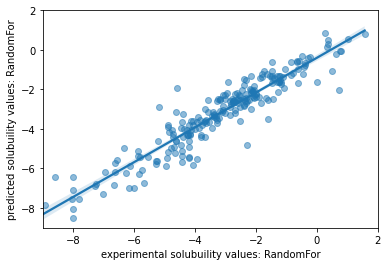

In [40]:
ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.5})
ax.set_xlabel('experimental solubuility values: RandomFor')
ax.set_ylabel('predicted solubuility values: RandomFor')
ax.set_xlim(-9, 2)
ax.set_ylim(-9, 2)
plt.show()

## regression model with LASSO


In [41]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
r2 = clf.score(X_test, Y_test)
r2

0.7964626385470599

In [42]:
Y_predlaso = clf.predict(X_test)

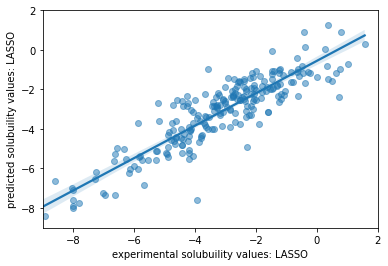

In [43]:
ax = sns.regplot(Y_test, Y_predlaso, scatter_kws={'alpha':0.5})
ax.set_xlabel('experimental solubuility values: LASSO')
ax.set_ylabel('predicted solubuility values: LASSO')
ax.set_xlim(-9, 2)
ax.set_ylim(-9, 2)
plt.show()

**Xgboost**

In [44]:
import xgboost as xgb

In [45]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=50)

In [46]:
xgb_model.fit(X_train, Y_train)

[12:04:06] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:04:06] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=50, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
Y_predxgb = xgb_model.predict(X_test)

In [48]:
mse=mean_squared_error(Y_test, Y_predxgb)

print(np.sqrt(mse))

0.6639247050304932


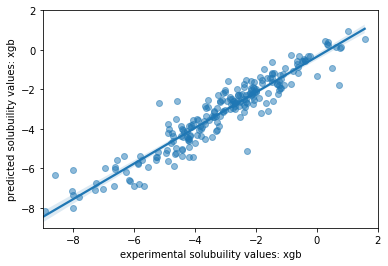

In [49]:
ax = sns.regplot(Y_test, Y_predxgb, scatter_kws={'alpha':0.5})
ax.set_xlabel('experimental solubuility values: xgb')
ax.set_ylabel('predicted solubuility values: xgb')
ax.set_xlim(-9, 2)
ax.set_ylim(-9, 2)
plt.show()

## From the above three model we can infer that the score of the Random Forest is highest w.r.t the LASSO and XGBoost.

## So, on the basis of the model score I will go with the RANDOM FOREST MODEL.

## Here the feature selection is is based on the Univariate roc-auc. it is a regression model.

### ***please upvote this notebook if it is helpful, thanks *** 